# Multi-layer perceptron 

On entraîne ici un MLP sur un ensemble choisi des features musicales agrégées extraites par librosa

### I. Chargement et preprocessing des données

In [1]:
import numpy as np
import pandas as pd
from utils.load_data import fma_load

features = fma_load('data/fma_metadata/features.csv')

features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
...                ...       ...       ...       ...       ...       ...   
155316       -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317       -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318        0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319       -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   
155320        0.489665  1.862421  0.854461 -0.103666 -0.249835  0.360283   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   
...              ...       ...       ...       ...  ...       ...       ...   
155316     -0.237794  5.695442  0.830353  1.951819  ...  0.128410  0.022547   
155317     -0.628103 -0.082687 -0.229483 -0.492753  ...  0.132964  0.023548   
155318      1.713526  1.418444  1.325197  0.120333  ...  0.108324  0.017540   
155319     -0.780860  0.626281 -0.630938 -0.787229  ...  0.088311  0.018328   
155320     -0.366701  0.033578 -0.834606 -1.154845  ...  0.091421  0.020312   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   
...              ...        ...       ...       ...       ...       ...   
155316      0.019816   4.448255  0.172852  0.028773  0.028320  0.003906   
155317      0.026527   3.270612  0.196289  0.031116  0.027832  0.002441   
155318      0.020471   2.356727  0.212891  0.038450  0.037109  0.003418   
155319      0.017936   6.188604  0.167480  0.041480  0.038086  0.004883   
155320      0.016794  21.756050  0.845215  0.075141  0.044434  0.004395   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  
...              ...       ...  
155316      0.955388  0.012385  
155317      1.283060  0.019059  
155318      0.828569  0.017904  
155319      1.818740  0.020133  
155320      4.687204  0.137205  

[106574 rows x 518 columns]

In [2]:
tracks = fma_load('data/fma_metadata/tracks.csv')

In [3]:
y = tracks['track','genre_top']

In [101]:
print(f'Nombre de labels: {y.value_counts()}')

Nombre de labels: (track, genre_top)
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64


In [5]:
print(f'Nombre de labels non définis: {y.isna().sum()}')

Nombre de labels non définis: 56976


## II. Feature selection

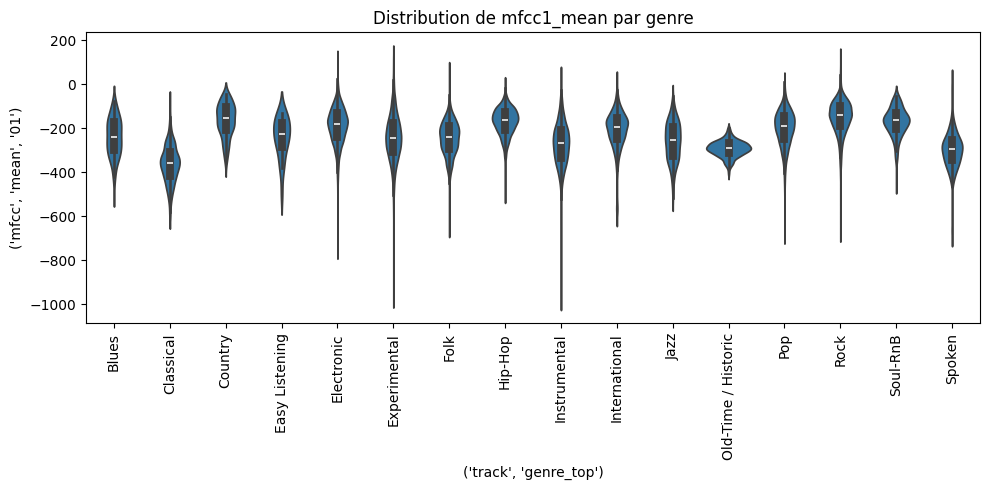

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.violinplot(x=y, y=features['mfcc','mean','01'])
plt.xticks(rotation=90)
plt.title("Distribution de mfcc1_mean par genre")
plt.tight_layout()

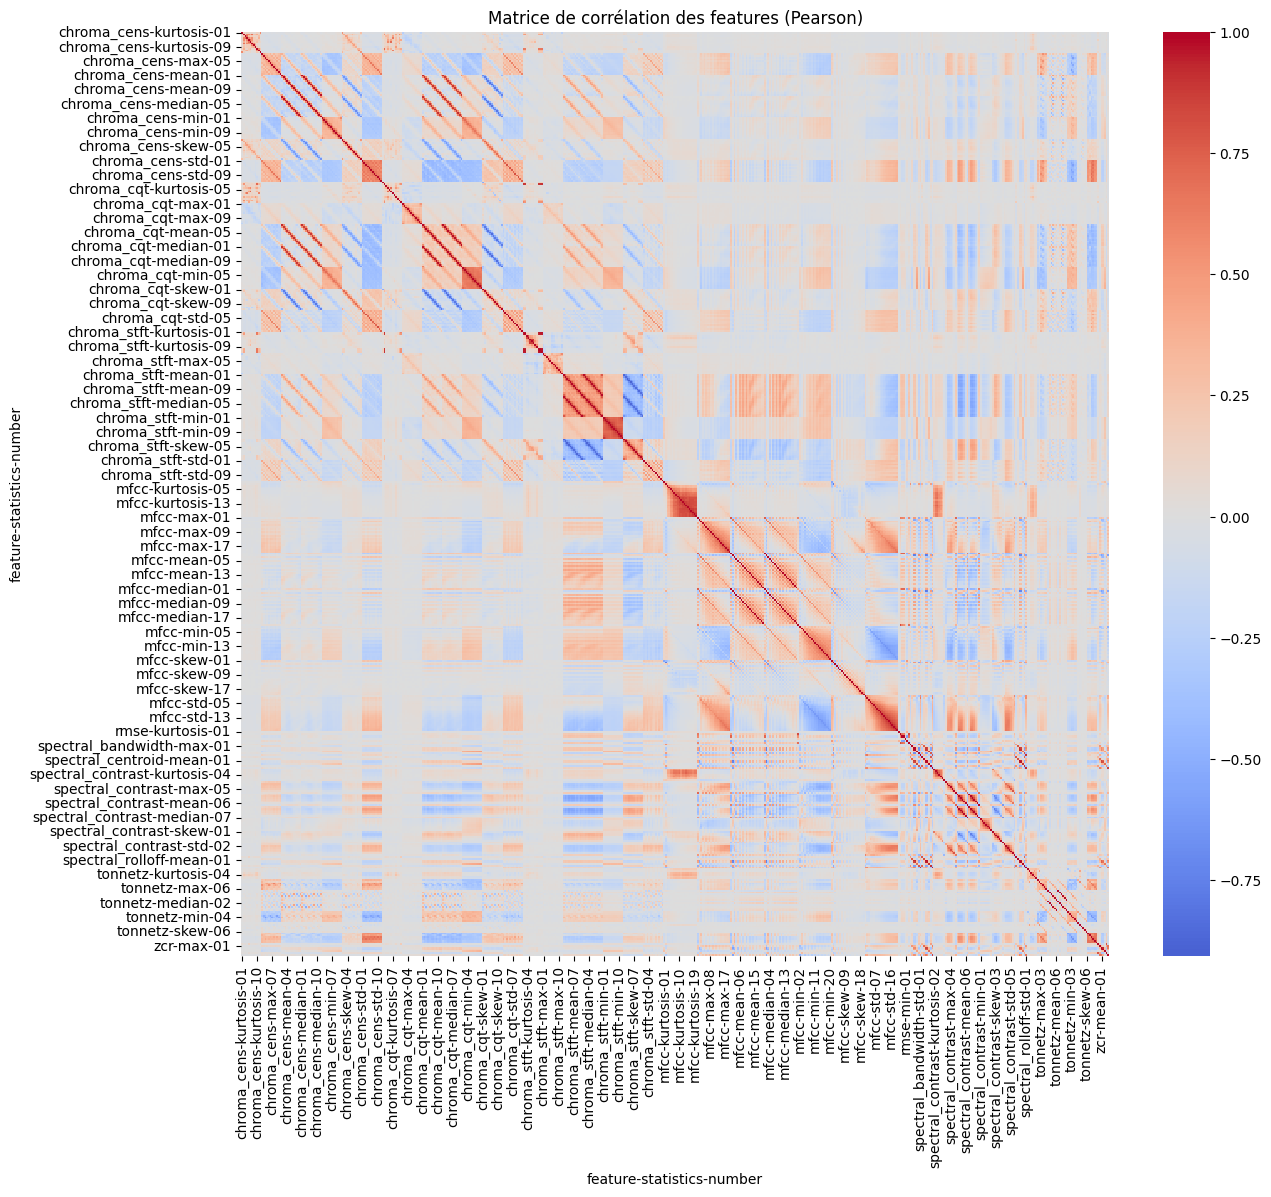

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = features.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation des features (Pearson)")
plt.show()


/home/rems/code/ENSAE/applied-statistical-learning/env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/rems/code/ENSAE/applied-statistical-learning/env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


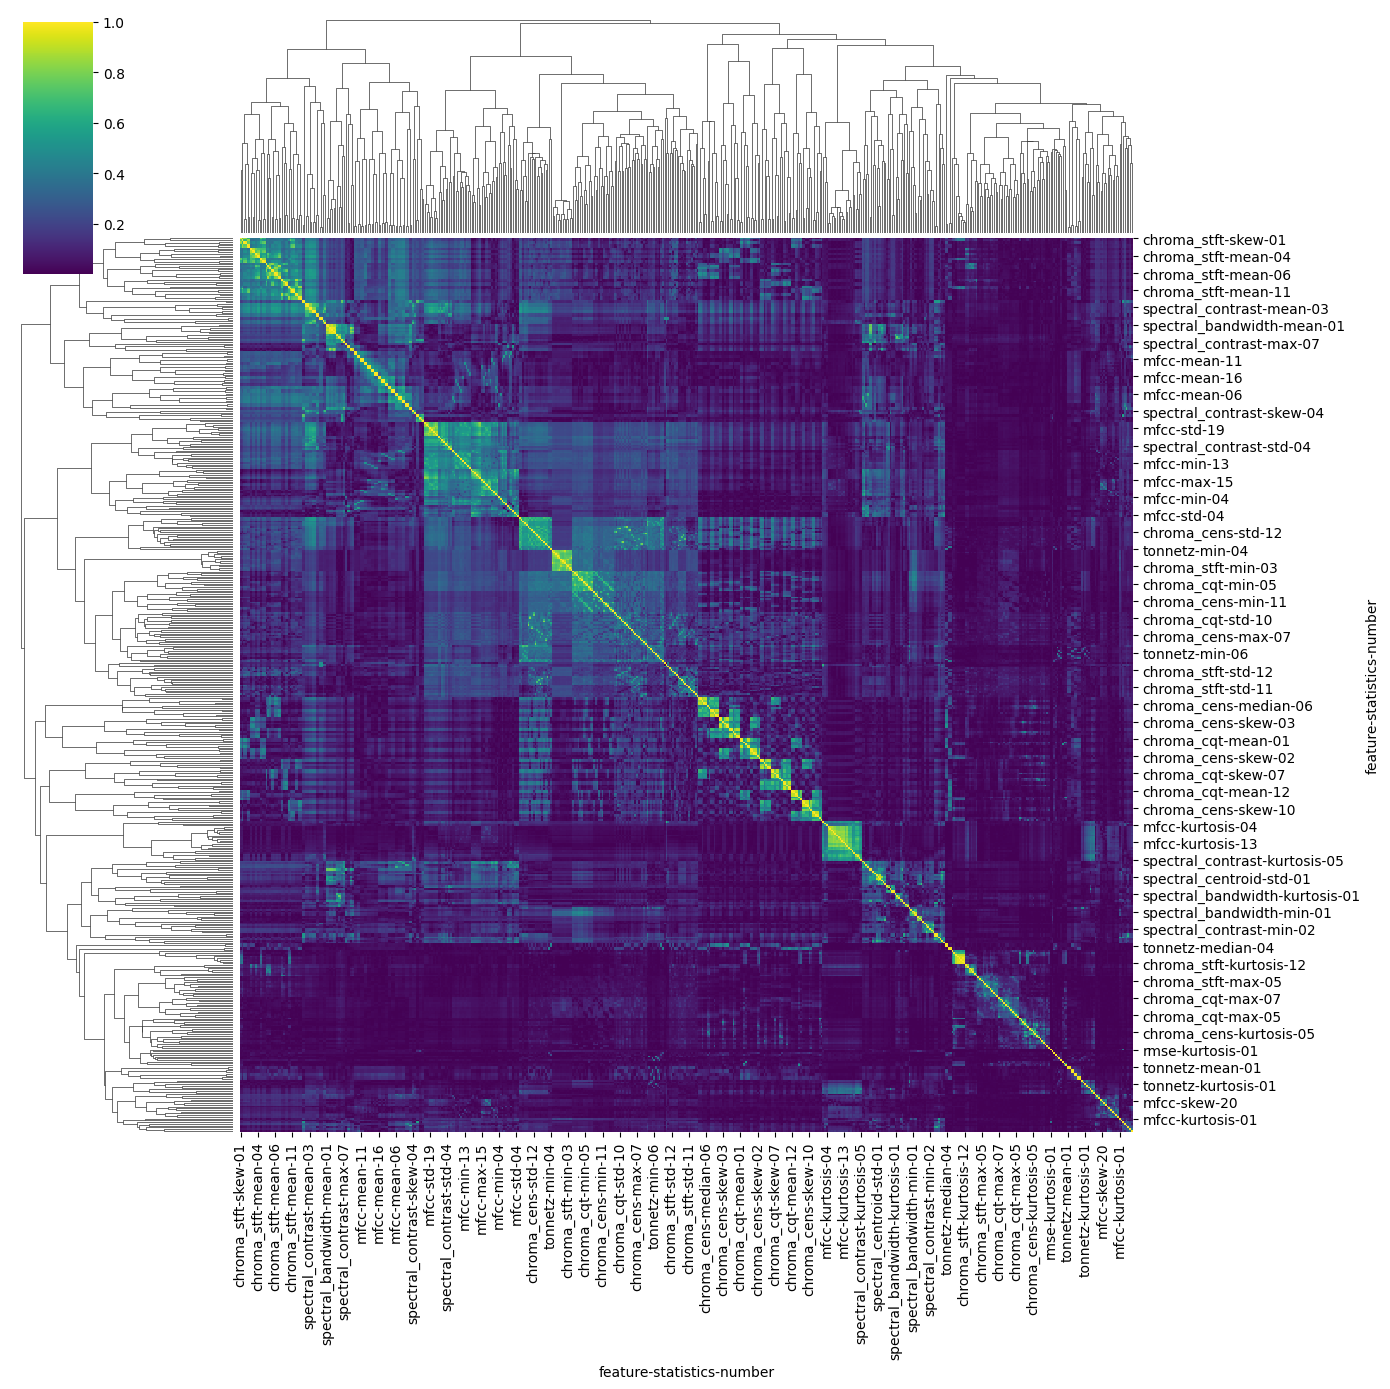

In [8]:
sns.clustermap(
    corr.abs(),
    figsize=(14,14),
    cmap="viridis"
)

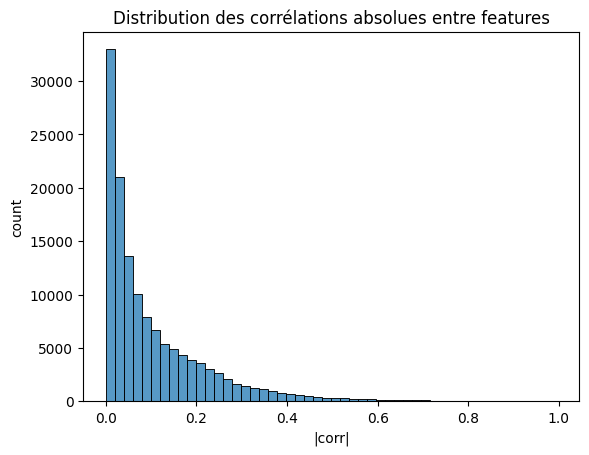

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vals = np.abs(corr.values[np.triu_indices_from(corr, k=1)])

sns.histplot(corr_vals, bins=50)
plt.title("Distribution des corrélations absolues entre features")
plt.xlabel("|corr|")
plt.ylabel("count")
plt.show()


In [10]:
threshold = 0.75

corr_matrix = corr.copy()

np.fill_diagonal(corr_matrix.values, 0) # Diagonal to zero

strong_corr = (corr_matrix.abs() > threshold)

pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if strong_corr.iloc[i, j]:
            pairs.append({
                "feature_1": corr_matrix.columns[i],
                "feature_2": corr_matrix.columns[j],
                "correlation": corr_matrix.iloc[i, j]
            })
pairs


[{'feature_1': ('chroma_cens', 'mean', '01'),
  'feature_2': ('chroma_cens', 'median', '01'),
  'correlation': np.float64(0.9717560508855922)},
 {'feature_1': ('chroma_cens', 'mean', '01'),
  'feature_2': ('chroma_cqt', 'mean', '01'),
  'correlation': np.float64(0.9281310171436797)},
 {'feature_1': ('chroma_cens', 'mean', '01'),
  'feature_2': ('chroma_cqt', 'median', '01'),
  'correlation': np.float64(0.9147936958742171)},
 {'feature_1': ('chroma_cens', 'mean', '02'),
  'feature_2': ('chroma_cens', 'median', '02'),
  'correlation': np.float64(0.9710105562557106)},
 {'feature_1': ('chroma_cens', 'mean', '02'),
  'feature_2': ('chroma_cqt', 'mean', '02'),
  'correlation': np.float64(0.8924722909612783)},
 {'feature_1': ('chroma_cens', 'mean', '02'),
  'feature_2': ('chroma_cqt', 'median', '02'),
  'correlation': np.float64(0.891592107193247)},
 {'feature_1': ('chroma_cens', 'mean', '02'),
  'feature_2': ('chroma_cqt', 'skew', '02'),
  'correlation': np.float64(-0.7727008716214067)},
 {'

### On sélectionne les features suivantes:

- On ne garde qu'une seule version des features chromatique

- On supprime systématiquement la médiane, trop corrélée à la moyenne

- On garde a priori toutes les autres

Comme pour la régression logistique, on regroupe les labels qui sont trop peu représentés dans une classe "Autre"

In [5]:
features.drop(columns=['chroma_cqt','chroma_cens'],inplace=True)
features = features.loc[:, features.columns.get_level_values('statistics') != 'median']

features

feature    chroma_stft                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2            -1.006041 -0.634076 -0.233752 -0.120917  0.004806  1.218982   
3            -0.951502 -0.660734 -1.050015 -0.977441 -0.343043 -0.515404   
5            -0.794551 -1.264806 -0.664387 -0.405196 -0.022688  0.014883   
10            0.954931 -1.266404  0.030425 -0.646823  0.664217  0.082626   
20           -0.048443 -0.543755 -1.336000 -0.410307 -0.684526 -0.960676   
...                ...       ...       ...       ...       ...       ...   
155316       -0.959207 -0.130793 -0.635587 -0.251981 -0.656534 -0.238574   
155317       -0.965068 -0.679953 -1.051353 -0.852524 -0.872679 -0.740262   
155318       -0.771414 -0.438261 -0.888968 -0.730804 -0.868208 -0.623147   
155319       -0.984837 -0.198621 -0.923624 -0.825457 -1.035743 -0.919991   
155320       -0.787214 -0.792066 -1.052318 -0.930889 -1.111142 -0.961365   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        03        04   
track_id                                            ...                       
2           0.969103 -0.884986 -0.469190 -0.515475  ...  0.038974  0.054125   
3          -0.973297 -1.261086 -1.132458 -0.953374  ...  0.051151  0.063831   
5          -0.190766 -0.507027 -0.868905 -0.952605  ...  0.084997  0.040730   
10         -1.241245  0.102074 -0.742071  0.670849  ...  0.088197  0.074358   
20         -1.108473 -1.320151 -0.754329 -1.029887  ...  0.105521  0.095003   
...              ...       ...       ...       ...  ...       ...       ...   
155316     -0.372219 -0.661802 -0.297405 -0.533092  ...  0.102859  0.128410   
155317     -0.737960 -1.060661 -1.029553 -0.949072  ...  0.135479  0.132964   
155318     -0.855489 -0.950127 -0.725640 -0.694402  ...  0.089910  0.108324   
155319     -0.655853 -0.887433 -0.398968 -0.233844  ...  0.092314  0.088311   
155320     -0.890171 -0.987430 -0.638198 -1.095618  ...  0.099553  0.091421   

feature                               zcr                                \
statistics                       kurtosis       max      mean       min   
number            05        06         01        01        01        01   
track_id                                                                  
2           0.012226  0.012111   5.758890  0.459473  0.085629  0.000000   
3           0.014212  0.017740   2.824694  0.466309  0.084578  0.000000   
5           0.012691  0.014759   6.808415  0.375000  0.053114  0.000000   
10          0.017952  0.013921  21.434212  0.452148  0.077515  0.000000   
20          0.022492  0.021355  16.669037  0.469727  0.047225  0.000977   
...              ...       ...        ...       ...       ...       ...   
155316      0.022547  0.019816   4.448255  0.172852  0.028773  0.003906   
155317      0.023548  0.026527   3.270612  0.196289  0.031116  0.002441   
155318      0.017540  0.020471   2.356727  0.212891  0.038450  0.003418   
155319      0.018328  0.017936   6.188604  0.167480  0.041480  0.004883   
155320      0.020312  0.016794  21.756050  0.845215  0.075141  0.004395   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  
...              ...       ...  
155316      0.955388  0.012385  
155317      1.283060  0.019059  
155318      0.828569  0.017904  
155319      1.818740  0.020133  
155320      4.687204  0.137205  

[106574 rows x 300 columns]

In [12]:
df_flat = features.copy()
df_flat.columns = ['_'.join(col).strip() for col in df_flat.columns.values]

df_flat['genre_top'] = y

df_flat.dropna(inplace=True)

df_flat

,chroma_stft_kurtosis_01,chroma_stft_kurtosis_02,chroma_stft_kurtosis_03,chroma_stft_kurtosis_04,chroma_stft_kurtosis_05,chroma_stft_kurtosis_06,chroma_stft_kurtosis_07,chroma_stft_kurtosis_08,chroma_stft_kurtosis_09,chroma_stft_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_min_01,zcr_skew_01,zcr_std_01,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,-1.006041,-0.634076,-0.233752,-0.120917,0.004806,1.218982,0.969103,-0.884986,-0.469190,-0.515475,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.000000,2.089872,0.061448,Hip-Hop
3,-0.951502,-0.660734,-1.050015,-0.977441,-0.343043,-0.515404,-0.973297,-1.261086,-1.132458,-0.953374,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.000000,1.716724,0.069330,Hip-Hop
5,-0.794551,-1.264806,-0.664387,-0.405196,-0.022688,0.014883,-0.190766,-0.507027,-0.868905,-0.952605,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.000000,2.193303,0.044861,Hip-Hop
10,0.954931,-1.266404,0.030425,-0.646823,0.664217,0.082626,-1.241245,0.102074,-0.742071,0.670849,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.000000,3.542325,0.040800,Pop
134,-0.972450,-1.047674,-1.312579,-1.120184,-1.280836,-1.215888,-1.006120,-0.915774,-0.781248,-1.012533,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.000000,1.806106,0.054623,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155315,-0.931622,-0.823569,-1.235423,-1.213406,-0.999892,-0.672000,-1.219753,-1.381937,-1.270755,-1.129524,...,0.108577,0.016631,0.014705,6.947788,0.188477,0.037708,0.002930,1.764233,0.018679,Rock
155316,-0.959207,-0.130793,-0.635587,-0.251981,-0.656534,-0.238574,-0.372219,-0.661802,-0.297405,-0.533092,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.003906,0.955388,0.012385,Rock
155317,-0.965068,-0.679953,-1.051353,-0.852524,-0.872679,-0.740262,-0.737960,-1.060661,-1.029553,-0.949072,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.002441,1.283060,0.019059,Rock


## III. Construction du MLP feed-forward

Le code présenté ici est en grande majorité emprunté du TP correspondant

In [ ]:
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_encoded = le.fit_transform(df_flat['genre_top'])

df_flat.drop(columns=['genre_top'],inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_flat.values)


X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y_encoded, dtype=torch.long)

print(X.shape,y.shape)
print("Classes:", le.classes_)

torch.Size([49598, 300]) torch.Size([49598])
Classes: ['Classical' 'Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Jazz' 'Old-Time / Historic' 'Other' 'Pop' 'Rock'
 'Spoken']


In [11]:
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

all_train = TensorDataset(X_train,y_train)

num_train = int(0.8 * len(all_train))

trainset, valset = torch.utils.data.random_split(all_train, [num_train, len(all_train) - num_train])
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
valloader = DataLoader(valset, batch_size=32, shuffle=True)

In [12]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [21]:
y_train.shape

torch.Size([39678])

Setup très simple: deux couches cachées avec un Dropout léger

In [22]:
class MLP(nn.Module):
    def __init__(self, input_size = X_train.shape[1], hidden_sizes = [384,256,128,64], output_size = 13):
        super().__init__()

        self.clf = nn.Sequential(
            nn.Linear(input_size,hidden_sizes[0]),
            nn.BatchNorm1d(hidden_sizes[0]),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(hidden_sizes[0],hidden_sizes[1]),
            nn.BatchNorm1d(hidden_sizes[1]),
            nn.ReLU(),
            nn.Dropout(0.15),

            nn.Linear(hidden_sizes[1],hidden_sizes[2]),
            nn.BatchNorm1d(hidden_sizes[2]),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(hidden_sizes[2],hidden_sizes[3]),
            nn.BatchNorm1d(hidden_sizes[3]),
            nn.ReLU(),
            nn.Dropout(0.05),

            nn.Linear(hidden_sizes[3],output_size),
        )

    def forward(self, X):
        return self.clf(X)

In [23]:
# Training consists of gradient steps over mini batch of data
def train(model, trainloader, criterion, optimizer, epoch, num_epochs):
    # We enter train mode. This is useless for the linear model
    # but is important for layers such as dropout, batchnorm, ...
    model.train()

    loop = tqdm(trainloader)
    loop.set_description(f'Training Epoch [{epoch + 1}/{num_epochs}]')

    # We iterate over the mini batches of our data
    for inputs, targets in loop:

        # Erase any previously stored gradient
        optimizer.zero_grad()


        outputs = model(inputs) # Forwards stage (prediction with current weights)
        loss = criterion(outputs, targets) # loss evaluation

        loss.backward() # Back propagation (evaluate gradients)


        # Making gradient step on the batch (this function takes care of the gradient step for us)
        optimizer.step()

def validation(model, valloader, loss):
    # Do not compute gradient, since we do not need it for validation step
    with torch.no_grad():
        # We enter evaluation mode.
        model.eval()

        total = 0 # keep track of currently used samples
        running_loss = 0.0 # accumulated loss without averagind
        accuracy = 0.0 # accumulated accuracy without averagind (number of correct predictions)

        loop = tqdm(valloader) # This is for the progress bar
        loop.set_description('Validation in progress')


        # We again iterate over the batches of validation data. batch_size does not play any role here
        for inputs, targets in loop:
            # Run samples through our net
            outputs = model(inputs)

            # Total number of used samples
            total += inputs.shape[0]

            # Multiply loss by the batch size to erase averagind on the batch
            running_loss += inputs.shape[0] * loss(outputs, targets).item()

            # how many correct predictions
            accuracy += (outputs.argmax(dim=1) == targets).sum().item()

            # set nice progress meassage
            loop.set_postfix(val_loss=(running_loss / total), val_acc=(accuracy / total))       
        
        return running_loss / total, accuracy / total

In [24]:
# Compute class weights
class_counts = np.bincount(y_train)
class_weights = 1.0 / np.sqrt(class_counts)
class_weights = class_weights / class_weights.sum() * len(class_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [25]:
# Net + training parameters
num_epochs = 50 # how many passes over the whole train data
lr = 0.002 # learning rate

net = MLP() # Our neural net
criterion = nn.CrossEntropyLoss(weight=class_weights,label_smoothing=0.05) # Loss function to be optimized
optimizer = optim.AdamW(net.parameters(), lr=lr, weight_decay=1e-4) # Optimization algorithm
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=2)

In [26]:
# num_epochs indicates the number of passes over the data

patience = 5
best_loss = float('inf')
wait = 0
best_model_state = None

for epoch in range(num_epochs):

    # makes one pass over the train data and updates weights
    train(net, trainloader, criterion, optimizer, epoch, num_epochs)

    # makes one pass over validation data and provides validation statistics
    val_loss, val_acc = validation(net, valloader, criterion)

    scheduler.step(val_loss)

    # check si amélioration
    if val_loss < best_loss:
        best_loss = val_loss
        wait = 0
        best_model_state = net.state_dict()   # on sauvegarde le meilleur modèle
    else:
        wait += 1

    # early stopping déclenché ?
    if wait >= patience:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# restaurer meilleur modèle
net.load_state_dict(best_model_state)
print("Best model restored")

Validation in progress: 100%|██████████| 248/248 [00:00<00:00, 555.97it/s, val_acc=0.671, val_loss=1.51]


Early stopping triggered at epoch 17
Best model restored


In [27]:
testset = TensorDataset(X_test,y_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

test_loss, test_acc = validation(net, testloader, criterion)
print(f'Test accuracy: {test_acc} | Test loss: {test_loss}')

Validation in progress: 100%|██████████| 310/310 [00:01<00:00, 301.50it/s, val_acc=0.666, val_loss=1.51]

Test accuracy: 0.6658266129032258 | Test loss: 1.5103728067490363


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

net.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for X, y in testloader:
        X = X
        y = y

        logits = net(X)                  # shape: [batch_size, num_classes]
        preds = torch.argmax(logits, dim=1)

        y_true.append(y.cpu())
        y_pred.append(preds.cpu())

y_true = torch.cat(y_true).numpy()
y_pred = torch.cat(y_pred).numpy()

print(classification_report(y_true, y_pred, digits=3, target_names=le.classes_))

                     precision    recall  f1-score   support

          Classical      0.810     0.780     0.795       246
         Electronic      0.708     0.622     0.662      1874
       Experimental      0.673     0.639     0.656      2122
               Folk      0.522     0.701     0.598       561
            Hip-Hop      0.712     0.697     0.705       710
       Instrumental      0.349     0.454     0.395       416
      International      0.627     0.543     0.582       278
               Jazz      0.379     0.439     0.407       114
Old-Time / Historic      0.891     0.955     0.922       111
              Other      0.392     0.307     0.344       101
                Pop      0.296     0.309     0.303       466
               Rock      0.789     0.803     0.796      2836
             Spoken      0.622     0.659     0.640        85

           accuracy                          0.666      9920
          macro avg      0.598     0.608     0.600      9920
       weighted avg   

In [29]:
cm = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(cm,index=le.classes_,columns=le.classes_)
cm_df

,Classical,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Other,Pop,Rock,Spoken
Classical,192,4,10,3,2,20,2,4,0,1,4,4,0
Electronic,4,1166,226,38,97,93,22,8,0,7,92,119,2
Experimental,20,163,1356,79,33,100,21,39,9,8,76,202,16
Folk,4,1,39,393,6,23,8,2,2,2,28,53,0
Hip-Hop,0,100,20,5,495,12,5,0,0,4,35,34,0
Instrumental,10,46,88,24,2,189,2,4,0,0,14,37,0
International,1,29,7,22,13,2,151,6,0,13,11,20,3
Jazz,2,5,15,6,1,12,5,50,0,0,4,13,1
Old-Time / Historic,1,0,3,1,0,0,0,0,106,0,0,0,0
Other,0,10,10,8,3,0,4,2,0,31,6,26,1
